## Micro Credit Defaulter Project

### The idea of this project is to build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan or not. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading Datafile
df=pd.read_csv('Data file.csv')

In [3]:
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


Since unnamed column has no effect we can drop this column

In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
pd.set_option('display.max_columns',36)

Command to see all the columns while checking the dataset

In [6]:
df

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

We have integers, float and object datatypes in our dataset

In [8]:
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

There are no null values in the dateset

In [9]:
#Displaying first 5 rows
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [10]:
#Displaying Last 5 rows
df.tail()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,2016-06-17
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,2016-06-12
209590,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,2016-07-29
209591,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,2016-07-25
209592,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,7526,2,1.0,9065.0,4532.5,356.70,3,19,16591,7526.0,392.20,0.0,0.0,0,0,2,18,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,2016-07-07


In [11]:
#Listing columns
columns = list(df.columns)
columns

['label',
 'msisdn',
 'aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'last_rech_date_ma',
 'last_rech_date_da',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_da_rech30',
 'fr_da_rech30',
 'cnt_da_rech90',
 'fr_da_rech90',
 'cnt_loans30',
 'amnt_loans30',
 'maxamnt_loans30',
 'medianamnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'maxamnt_loans90',
 'medianamnt_loans90',
 'payback30',
 'payback90',
 'pcircle',
 'pdate']

List of all the feature names available in the dataset

In [12]:
for i in columns:
     print(df[i].unique())

[0 1]
['21408I70789' '76462I70374' '17943I70372' ... '22758I85348' '59712I82733'
 '65061I85339']
[2.72000000e+02 7.12000000e+02 5.35000000e+02 ... 8.03380622e+05
 5.81435484e+05 8.11881373e+05]
[ 3055.05       12122.          1398.         ... 11843.11166667
 12488.22833333  4489.362     ]
[ 3065.15       12124.75        1398.         ...   151.87233333
 12574.37        4534.82      ]
[ 220.13 3691.26  900.13 ... 5861.83  411.83  483.92]
[ 260.13 3691.26  900.13 ... 1728.36 8893.2   984.58]
[2.00000000e+00 2.00000000e+01 3.00000000e+00 ... 7.67980563e+05
 6.11678500e+05 5.90843122e+05]
[0.00000000e+00 5.50000000e+01 6.30000000e+01 ... 8.09043117e+05
 7.99233445e+05 6.36529127e+05]
[ 1539  5787   947  2309  3178   773  7526  1547   770     0  4048  8000
   173  1924  2320  4917  2593 10000  1720 11874  3193 16000  1333  4067
  3467  5814  7400  7560   777 15400  1933 17391 11927  6960 21739  1554
 11327  4940 12500   790  5214 32000 11900  9400 11000  1580  4340  3466
 55000   769 11004

Checking for all the unique values.
This well help us to identify if they are any special character in our dataset

In [13]:
df.describe(include='all')

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
count,209593.000000,209593,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593,209593
unique,NaN,186243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,82
top,NaN,47819I90840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UPW,2016-07-04
freq,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209593,3150
mean,0.875177,NaN,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,NaN,NaN
std,0.330519,NaN,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,NaN,NaN
min,0.000000,NaN,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,1.000000,NaN,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,1.000000,NaN,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,NaN,NaN
75%,1.000000,NaN,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,NaN,NaN


There are 9 columns which shows negative value. Have to check if that data is realsitic

Columns with neagiive value : ('aon','daily_decr30','daily_decr90','rental30','rental90','last_rech_date_ma',
                               'last_rech_date_da','medianmarechprebal30','medianmarechprebal90')  
                             
The account balance can be negative hence having negative value in 'rental30' and 'rental90' is a possibility.

'pcircle' has only 1 value, hence it will have no impact on machine learning an can be dropped.
'msisdn' is a mobile number and is unique to each customer. Hence can be dropped too.

In [14]:
df.drop(['pdate','pcircle','msisdn','rental30','rental90'],axis=1,inplace=True)

Dropping the non required columns as well as 'rental30' and 'rental90', both this column will be added later once we clear the negative values from the dataset.

In [15]:
#dropping all the negative values from the dataset
df= df[(df >=0).all(axis=1)]

In [16]:
df.describe()

,label,aon,daily_decr30,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,203119.000000,203119.000000,203119.000000,203119.000000,203119.000000,203119.000000,203119.000000,203119.000000,203119.000000,203119.000000,203119.000000,203119.000000,203119.000000,203119.000000,203119.000000,203119.000000,203119.00000,203119.000000,203119.000000,203119.000000,203119.000000,203119.000000,203119.000000,203119.000000,203119.000000,203119.000000,203119.000000,203119.000000,203119.000000,203119.000000,203119.000000
mean,0.883187,8160.657531,5511.941860,6231.105509,3799.380829,3752.767072,2085.289825,4.047706,3776.156209,7849.712883,1830.622741,3844.004978,6.434740,7.712902,12648.333839,1882.222855,94.46703,265.328927,3749.316510,0.042399,0.047051,2.799177,18.230230,274.415764,0.054279,18.557305,24.057572,6.721587,0.046099,3.438569,4.376189
std,0.321198,75905.229467,9309.431354,11027.961422,54219.841938,53650.829181,2376.018149,4.283372,53944.796311,10226.455962,2072.939466,53952.226750,7.241162,12.474904,17004.000431,2084.915118,366.93598,4208.689338,53882.074446,0.402013,0.965935,2.573166,17.511701,4244.435327,0.218531,224.834053,26.665241,2.126595,0.200711,8.773097,10.282455
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,250.000000,47.631500,47.906667,1.000000,0.000000,770.000000,1.000000,0.000000,1546.000000,770.000000,12.000000,2.000000,0.000000,2486.000000,773.000000,15.80000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,530.000000,1603.126000,1640.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4717.000000,1539.000000,35.200000,4.000000,2.000000,7695.000000,1539.000000,37.10000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,1.000000,1.800000
75%,1.000000,983.000000,7448.295000,8048.110000,7.000000,0.000000,2309.000000,6.000000,6.000000,10112.000000,1924.000000,84.600000,9.000000,8.000000,16209.000000,1924.000000,80.50000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.833333,4.571429
max,1.000000,999860.755168,265926.000000,320630.000000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.000000,88.000000,953036.000000,55000.000000,41456.50000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


We can see now there is no negative value

In [17]:
df

,label,aon,daily_decr30,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,1,1075.0,36.936000,36.936000,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,1,1013.0,11843.111667,11904.350000,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,1,1732.0,12488.228333,12574.370000,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


In [18]:
(209593-203119)*100/209593

3.0888436159604566

We have lost 3% of the data. We cannot lose more than 7 to 8% of the data as data is expensive.

We now have to merge the 'rental 30' and 'rental 90' into the data. This can be done by loading the dataset again with a new name and then merge it will the old dataframe

In [19]:
df_new=pd.read_csv('Data file.csv')

In [20]:
df['rental30']=df_new['rental30']

In [21]:
df['rental90']=df_new['rental90']

In [22]:
df

,label,aon,daily_decr30,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,rental30,rental90
0,0,272.0,3055.050000,3065.150000,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,220.13,260.13
1,1,712.0,12122.000000,12124.750000,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,3691.26,3691.26
2,1,535.0,1398.000000,1398.000000,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,900.13,900.13
3,1,241.0,21.228000,21.228000,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,159.42,159.42
4,1,947.0,150.619333,150.619333,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,1098.90,1098.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,1089.19,1089.19
209589,1,1075.0,36.936000,36.936000,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,1728.36,1728.36
209590,1,1013.0,11843.111667,11904.350000,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,5861.83,8893.20
209591,1,1732.0,12488.228333,12574.370000,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,411.83,984.58


'rental30' and 'rental90' has been added to the data.

<AxesSubplot:xlabel='label', ylabel='count'>

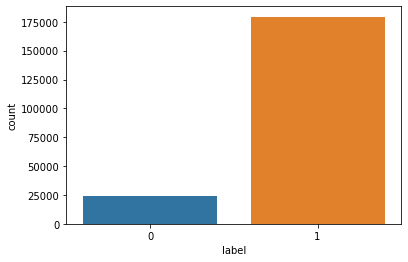

In [29]:
sns.countplot(x = 'label', data = df)

Label is our target variable and it is clearly imbalance.

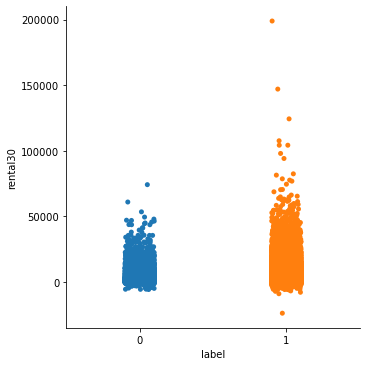

In [30]:
sns.catplot(x='label',y='rental30',data=df)

The above data shows that customer who maitains balance of over 50000 in last 30 days is less likely to default the loan

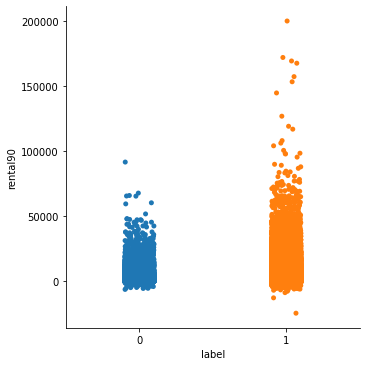

In [ ]:
sns.catplot(x='label',y='rental90',data=df)

The above data shows that customer who maitains balance of over 50000 in last 90 days is less likely to default the loan

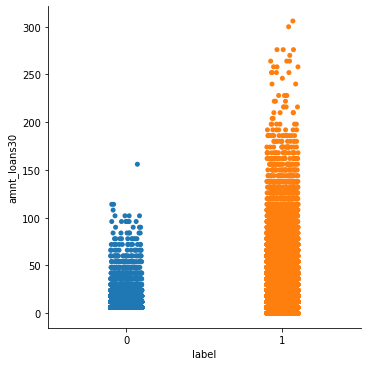

In [ ]:
sns.catplot(x='label',y='amnt_loans30',data=df)

Customer who take more than 50 loans in last 30 days are less likely to default the loan.

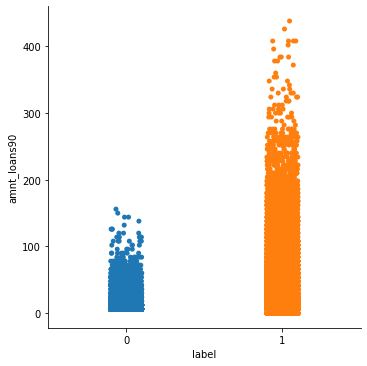

In [ ]:
sns.catplot(x='label',y='amnt_loans90',data=df)

Customer who take more than 90 loans in last 90 days do not default their payment.

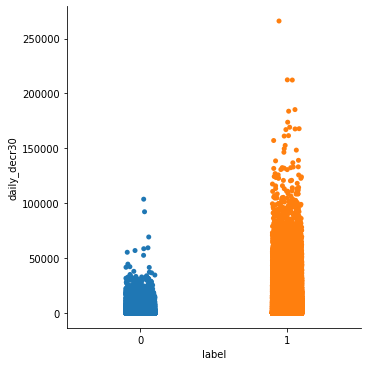

In [ ]:
sns.catplot(x='label',y='daily_decr30',data=df)

The above data clearly shows that if customer is spending daily average of over 40000 in last 30 then they are more likely to pay the loan.

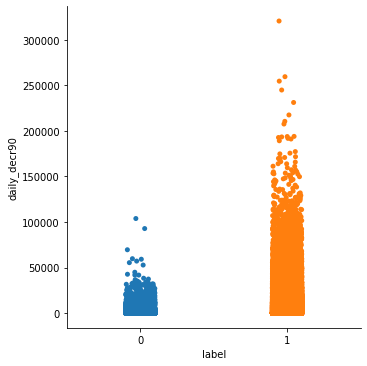

In [ ]:
sns.catplot(x='label',y='daily_decr90',data=df)

The above data clearly shows that if customer is spending daily average of over 40000 in last 90 then they are more likely to pay the loan.

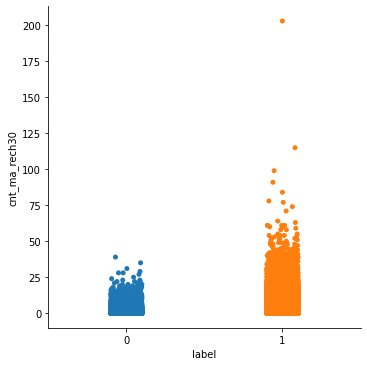

In [ ]:
sns.catplot(x='label',y='cnt_ma_rech30',data=df)

If the customer is recharging the main account more than 20 times in last 30 days then they are more like to pay the loan amount.

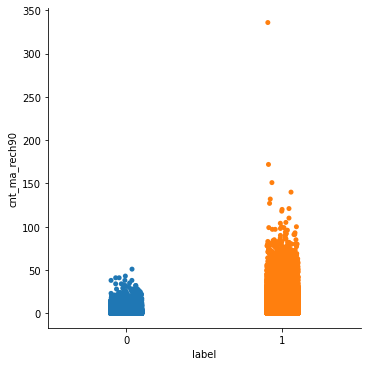

In [ ]:
sns.catplot(x='label',y='cnt_ma_rech90',data=df)

If the customer is recharging the main account more than 20 times in last 90 days then they are more like to pay the loan amount.

# Checking Correlation

In [23]:
cor_df=df
corr=cor_df.corr()
corr['label'].sort_values()

fr_da_rech90           -0.006770
medianmarechprebal30   -0.003660
aon                    -0.003257
fr_da_rech30           -0.000628
fr_ma_rech30            0.000269
cnt_da_rech90           0.000457
maxamnt_loans30         0.000591
last_rech_date_da       0.000777
last_rech_date_ma       0.003291
cnt_da_rech30           0.003886
cnt_loans90             0.005160
medianamnt_loans90      0.033279
medianmarechprebal90    0.035454
medianamnt_loans30      0.041934
payback30               0.042385
payback90               0.042864
rental30                0.053048
rental90                0.070185
fr_ma_rech90            0.073161
maxamnt_loans90         0.080027
medianamnt_ma_rech90    0.109699
last_rech_amt_ma        0.120954
medianamnt_ma_rech30    0.130066
daily_decr90            0.160075
daily_decr30            0.161804
cnt_loans30             0.188395
amnt_loans30            0.189479
amnt_loans90            0.192480
sumamnt_ma_rech30       0.193586
sumamnt_ma_rech90       0.197374
cnt_ma_rec

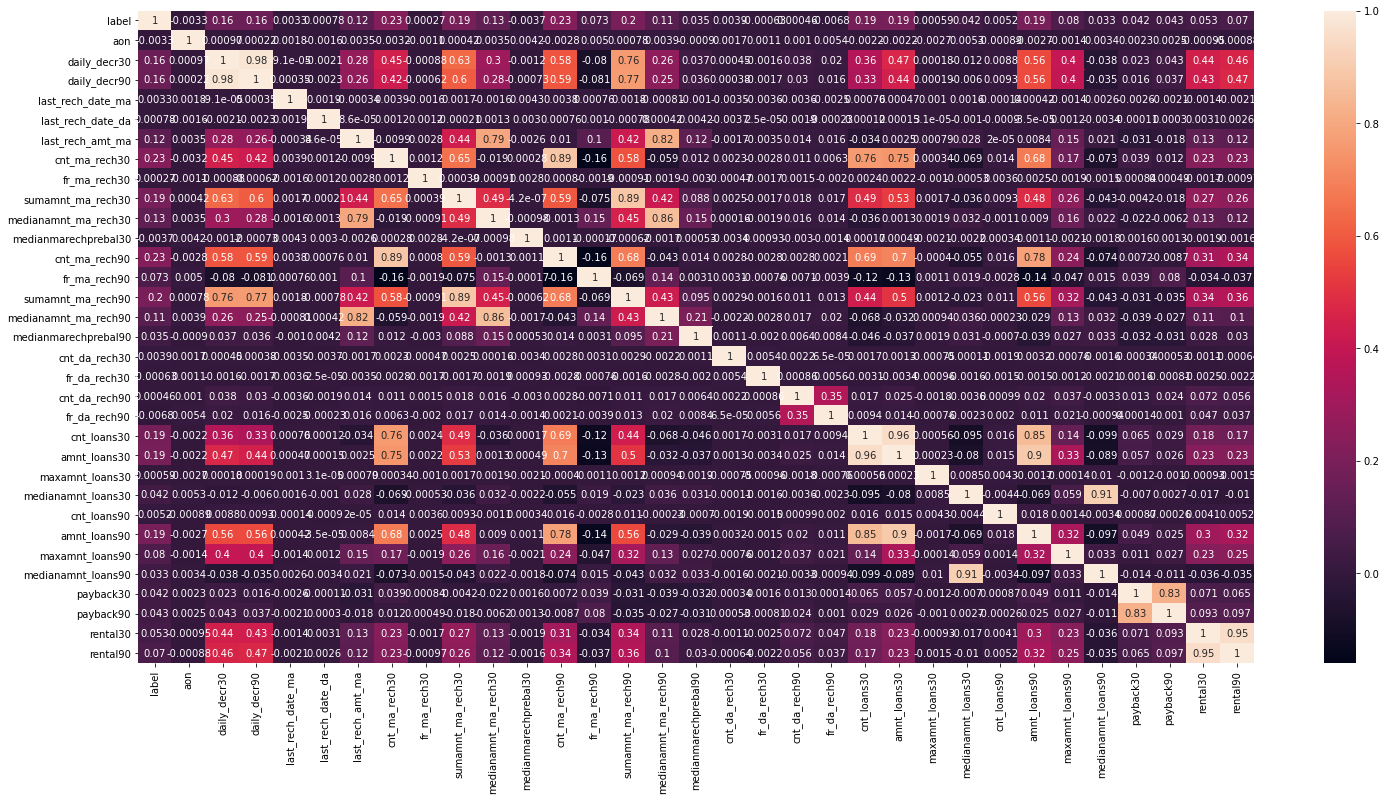

In [24]:
plt.figure(figsize=(25,12))
sns.heatmap(corr,annot=True)
plt.show()

Negligible co relation between 'fr_da_rech30' and 'maxamnt_loans30' with 'label' hence we will drop the columns for model fitting.

Some features are highly corelated to each other like 'daily_decr30' and 'daily_decr90'. This indicate that we may use PCA to avoid multi colinearity while using the model.

In [25]:
df

,label,aon,daily_decr30,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,rental30,rental90
0,0,272.0,3055.050000,3065.150000,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,220.13,260.13
1,1,712.0,12122.000000,12124.750000,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,3691.26,3691.26
2,1,535.0,1398.000000,1398.000000,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,900.13,900.13
3,1,241.0,21.228000,21.228000,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,159.42,159.42
4,1,947.0,150.619333,150.619333,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,1098.90,1098.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,1089.19,1089.19
209589,1,1075.0,36.936000,36.936000,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,1728.36,1728.36
209590,1,1013.0,11843.111667,11904.350000,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,5861.83,8893.20
209591,1,1732.0,12488.228333,12574.370000,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,411.83,984.58


Lets drop the columns which has no co relation with our target variable

In [26]:
df.drop(['fr_da_rech30','maxamnt_loans30'],axis=1,inplace=True)

Now we will move forward to remove the outliers using the zscore

In [27]:
from scipy.stats import zscore

In [28]:
zscr=np.abs(zscore(df))
threshold=3
print(np.where(zscr>3))

(array([    21,     22,     22, ..., 203112, 203113, 203113], dtype=int64), array([13, 13, 28, ..., 24, 22, 26], dtype=int64))


In [29]:
df_new=df[(zscr<3).all(axis=1)]

In [30]:
df_new

,label,aon,daily_decr30,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,rental30,rental90
0,0,272.0,3055.050000,3065.150000,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0,0,2,12,0.0,2.0,12,6,0.0,29.000000,29.000000,220.13,260.13
1,1,712.0,12122.000000,12124.750000,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0,0,1,12,0.0,1.0,12,12,0.0,0.000000,0.000000,3691.26,3691.26
2,1,535.0,1398.000000,1398.000000,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0,0,1,6,0.0,1.0,6,6,0.0,0.000000,0.000000,900.13,900.13
3,1,241.0,21.228000,21.228000,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0,0,2,12,0.0,2.0,12,6,0.0,0.000000,0.000000,159.42,159.42
4,1,947.0,150.619333,150.619333,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0,0,7,42,0.0,7.0,42,6,0.0,2.333333,2.333333,1098.90,1098.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0,0,2,12,0.0,2.0,12,6,0.0,1.000000,1.000000,1089.19,1089.19
209589,1,1075.0,36.936000,36.936000,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0,0,3,18,0.0,3.0,18,6,0.0,1.000000,1.000000,1728.36,1728.36
209590,1,1013.0,11843.111667,11904.350000,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0,0,4,42,0.0,6.0,54,12,0.0,4.000000,3.833333,5861.83,8893.20
209591,1,1732.0,12488.228333,12574.370000,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,1,0,2,18,0.0,3.0,24,12,0.0,0.000000,10.500000,411.83,984.58


In [31]:
df_new.shape

(157848, 31)

In [32]:
(209593-157848)*100/209593

24.688324514654592

After removing negative values and outliers we are losing 24.68% of the data. Since we cannot afford to lose 7% to 8% of the data we cannot use the same

In [33]:
df

,label,aon,daily_decr30,daily_decr90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,rental30,rental90
0,0,272.0,3055.050000,3065.150000,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0,0,2,12,0.0,2.0,12,6,0.0,29.000000,29.000000,220.13,260.13
1,1,712.0,12122.000000,12124.750000,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0,0,1,12,0.0,1.0,12,12,0.0,0.000000,0.000000,3691.26,3691.26
2,1,535.0,1398.000000,1398.000000,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0,0,1,6,0.0,1.0,6,6,0.0,0.000000,0.000000,900.13,900.13
3,1,241.0,21.228000,21.228000,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0,0,2,12,0.0,2.0,12,6,0.0,0.000000,0.000000,159.42,159.42
4,1,947.0,150.619333,150.619333,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0,0,7,42,0.0,7.0,42,6,0.0,2.333333,2.333333,1098.90,1098.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0,0,2,12,0.0,2.0,12,6,0.0,1.000000,1.000000,1089.19,1089.19
209589,1,1075.0,36.936000,36.936000,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0,0,3,18,0.0,3.0,18,6,0.0,1.000000,1.000000,1728.36,1728.36
209590,1,1013.0,11843.111667,11904.350000,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0,0,4,42,0.0,6.0,54,12,0.0,4.000000,3.833333,5861.83,8893.20
209591,1,1732.0,12488.228333,12574.370000,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,1,0,2,18,0.0,3.0,24,12,0.0,0.000000,10.500000,411.83,984.58


Lets check the skewness of each features

In [34]:
df.skew()

label                   -2.386004
aon                     10.361221
daily_decr30             3.911592
daily_decr90             4.214319
last_rech_date_ma       14.704379
last_rech_date_da       14.726993
last_rech_amt_ma         3.733605
cnt_ma_rech30            3.278298
fr_ma_rech30            14.698731
sumamnt_ma_rech30        6.380342
medianamnt_ma_rech30     3.430747
medianmarechprebal30    14.805939
cnt_ma_rech90            3.415616
fr_ma_rech90             2.277287
sumamnt_ma_rech90        4.879169
medianamnt_ma_rech90     3.687849
medianmarechprebal90    44.975609
cnt_da_rech30           17.721910
cnt_da_rech90           26.984389
fr_da_rech90            28.568067
cnt_loans30              2.688072
amnt_loans30             2.950719
medianamnt_loans30       4.555610
cnt_loans90             16.612248
amnt_loans90             3.122696
maxamnt_loans90          1.644090
medianamnt_loans90       4.912767
payback30                8.265910
payback90                6.862247
rental30      

Data is highky skewed.

We will use Power transform method to remove the skewness

In [35]:
from sklearn.preprocessing import power_transform

Before removing skew let's seperate our input feature and target feature

In [36]:
x=df.drop(columns='label')
y=df['label']

Powertransform was giving eror that it works on positive value only. Hence we will remove the feature like 'rental30' and 'rental90' which has negative value, will add it later. Then we will convert 0.00000 values in dataset to 0.000001. This will have minimal effect on the data

In [37]:
x1=pd.read_csv('micro_credit.csv')

In [38]:
x.drop(['rental30','rental90'],axis=1,inplace=True)

In [39]:
x.replace({0.00000: 0.00001}, inplace=True)

In [40]:
x2=power_transform(x)

In [41]:
x2=pd.DataFrame(data=x2,columns=x.columns)

In [42]:
x2.skew()

aon                     -0.304413
daily_decr30            -0.136993
daily_decr90            -0.126623
last_rech_date_ma        0.006170
last_rech_date_da        5.253726
last_rech_amt_ma        -0.041110
cnt_ma_rech30           -0.001328
fr_ma_rech30             0.150832
sumamnt_ma_rech30       -0.278755
medianamnt_ma_rech30    -0.170209
medianmarechprebal30    -0.029668
cnt_ma_rech90           -0.003601
fr_ma_rech90             0.134427
sumamnt_ma_rech90       -0.177942
medianamnt_ma_rech90    -0.021892
medianmarechprebal90     0.017917
cnt_da_rech30            6.881878
cnt_da_rech90            5.943296
fr_da_rech90            15.261660
cnt_loans30              0.034112
amnt_loans30             0.004677
medianamnt_loans30       3.432998
cnt_loans90              0.094115
amnt_loans90            -0.007314
maxamnt_loans90          0.356893
medianamnt_loans90       3.772133
payback30                0.277799
payback90                0.193054
dtype: float64

Now we will add the removed columns

In [43]:
x2['rental30']=x1['rental30']

In [44]:
x2['rental90']=x1['rental90']

Will use cuberoot method on below columns to remove the skew.

In [45]:
x2['rental30']=np.cbrt(x2['rental30'])

In [46]:
x2['rental90']=np.cbrt(x2['rental90'])

In [47]:
x2.skew()

aon                     -0.304413
daily_decr30            -0.136993
daily_decr90            -0.126623
last_rech_date_ma        0.006170
last_rech_date_da        5.253726
last_rech_amt_ma        -0.041110
cnt_ma_rech30           -0.001328
fr_ma_rech30             0.150832
sumamnt_ma_rech30       -0.278755
medianamnt_ma_rech30    -0.170209
medianmarechprebal30    -0.029668
cnt_ma_rech90           -0.003601
fr_ma_rech90             0.134427
sumamnt_ma_rech90       -0.177942
medianamnt_ma_rech90    -0.021892
medianmarechprebal90     0.017917
cnt_da_rech30            6.881878
cnt_da_rech90            5.943296
fr_da_rech90            15.261660
cnt_loans30              0.034112
amnt_loans30             0.004677
medianamnt_loans30       3.432998
cnt_loans90              0.094115
amnt_loans90            -0.007314
maxamnt_loans90          0.356893
medianamnt_loans90       3.772133
payback30                0.277799
payback90                0.193054
rental30                 0.085789
rental90      

Have tried multiple method and we are unable to get the skewness in the acceptable range of -0.5 to 0.5.

Hence we will keep the remaining skewness and move forward for model building

Before moving forward with PCA and model fitting we need to standardize our dataset.

We will use Standard Sacler for the same

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
sc=StandardScaler()
sc_x=sc.fit_transform(x2)

In [50]:
sc_x

array([[-0.55197773,  0.46022141,  0.43728702, ...,  1.79319139,
        -0.7100426 , -0.70903798],
       [ 0.42144216,  1.09162227,  1.04273513, ..., -1.03752531,
         0.70713863,  0.52906987],
       [ 0.15023254,  0.14156437,  0.12708373, ..., -1.03752531,
        -0.16563754, -0.26247106],
       ...,
       [ 0.73671073,  1.08016444,  1.03410086, ...,  0.726113  ,
         2.01615581,  2.08291637],
       [ 1.17815456,  1.10631617,  1.05991955, ...,  1.32590745,
         0.71325348,  0.84673756],
       [ 1.10617169,  0.62725252,  0.6013808 , ..., -1.03752531,
         0.19215262,  0.06201712]])

From co-relation heatmap we have understood that most of the features are co related to each other hence we will use PCA to avoid multi colinearity.

In [51]:
from sklearn.decomposition import PCA

In [52]:
testPCA=PCA()
Y=testPCA.fit(sc_x)

In [53]:
var_cumu=np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 31.53429294,  43.59968053,  52.57194243,  59.15255228,
        65.35812946,  70.39034391,  74.72333414,  78.41038805,
        81.6512057 ,  84.59166274,  87.3487971 ,  89.84814171,
        92.10779107,  93.61965981,  94.99312569,  96.14336294,
        97.08681088,  97.71271846,  98.12430415,  98.51493449,
        98.86259527,  99.19032824,  99.48778905,  99.66800843,
        99.80345224,  99.88984059,  99.9620247 ,  99.98220025,
        99.99522226, 100.        ])

The above variance shows the number of components against the data we will get. Since we have already lost 3% percent of the data while removing the negative values we have to keep atleast 96% of the data

Hence we will take the 16 components for PCA

In [54]:
FinalPCA=PCA(n_components=16)
final_x=FinalPCA.fit_transform(sc_x)
finalx=pd.DataFrame(final_x)

In [55]:
finalx

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.525058,-0.665859,-0.223331,-0.994345,-0.373346,-1.806040,-2.591280,0.364515,1.009679,0.541630,-0.110645,0.103306,1.131104,-0.008647,-0.292128,0.133920
1,0.032274,3.038926,-0.172687,0.904721,-0.366287,3.130253,-0.187495,-1.786739,0.275263,-0.910631,-0.689273,0.081418,1.224631,-0.046631,-0.264868,0.511310
2,-2.417567,1.473766,-0.230050,-0.280999,-0.520614,1.240861,0.564138,0.050546,-0.780130,0.091366,-0.183636,0.095863,0.884712,0.005342,0.341969,0.519285
3,-4.067714,-0.877548,-0.114200,-1.143857,-0.383750,0.816884,0.137338,-2.019600,0.913180,1.154176,-1.251544,0.225131,-1.631701,-0.057885,-0.149475,0.550954
4,2.711570,-0.817064,-0.432941,-0.182516,-0.373816,-0.746084,1.103741,-1.496789,-0.006426,0.206760,0.990629,-0.147819,-0.711035,0.051343,0.041493,0.086850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203114,0.441972,1.220552,-0.435836,0.230862,-0.567665,-0.729897,0.948601,-0.251744,0.275440,-0.292911,0.929568,-0.131075,0.994985,0.088078,0.241692,0.208273
203115,-0.073975,-0.520614,-0.384341,-2.262824,-0.404230,-1.035765,1.415420,-0.460537,-1.143171,-0.480361,-0.455322,0.138626,-0.514113,0.050324,0.015576,-0.135881
203116,3.535453,-1.304908,-0.232243,2.902608,0.176029,0.699904,-0.895595,-0.393929,0.065058,-1.598279,-0.660860,0.091537,0.032625,-0.055564,-0.529196,0.066426
203117,2.382163,0.192991,6.366886,1.126047,-0.025857,0.880952,-0.533478,0.536210,-0.958041,-1.945127,-1.247324,-3.566521,0.284449,3.515812,-0.532391,-0.386090


In [56]:
finalx.shape

(203119, 16)

In [57]:
y=df['label']

In [58]:
y.shape

(203119,)

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

Importing the libraries for model fitting and checking the score

We will check the best possible random state to train our model. Using LogisticRegression to check and then later will run with other models

In [60]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(finalx,y,test_size=.30,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is',maxAccu,' on Random state',maxRS)

Best Accuracy is 0.8892772745175266  on Random state 26


We can see that the best random state is 26. We will split the data with this random state

In [61]:
x_train,x_test,y_train,y_test=train_test_split(finalx,y,test_size=.30,random_state=26)

We will train and test the data using different classification Model

In [62]:
lg=LogisticRegression()
rfc=RandomForestClassifier(n_estimators=100)
dt=DecisionTreeClassifier()
gnb=GaussianNB()

In [79]:
model=(lg,rfc,dt,gnb)
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Accuracy score of',m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

Accuracy score of LogisticRegression()
0.8892772745175266
[[  806  6171]
 [  576 53383]]
              precision    recall  f1-score   support

           0       0.58      0.12      0.19      6977
           1       0.90      0.99      0.94     53959

    accuracy                           0.89     60936
   macro avg       0.74      0.55      0.57     60936
weighted avg       0.86      0.89      0.85     60936

Accuracy score of RandomForestClassifier()
0.909150584219509
[[ 2402  4575]
 [  961 52998]]
              precision    recall  f1-score   support

           0       0.71      0.34      0.46      6977
           1       0.92      0.98      0.95     53959

    accuracy                           0.91     60936
   macro avg       0.82      0.66      0.71     60936
weighted avg       0.90      0.91      0.89     60936

Accuracy score of DecisionTreeClassifier()
0.8556682420900618
[[ 2871  4106]
 [ 4689 49270]]
              precision    recall  f1-score   support

           0     

We will check the Underfitting or Overfitting of the model using Cross Validation

In [63]:
from sklearn.model_selection import cross_val_score

In [81]:
model=(lg,rfc,dt,gnb)
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print('Mean Accuracy of', m)
    print(score.mean())
    print('\n')

Mean Accuracy of LogisticRegression()
0.8831719339250993


Mean Accuracy of RandomForestClassifier()
0.9093043975906294


Mean Accuracy of DecisionTreeClassifier()
0.8640550508345323


Mean Accuracy of GaussianNB()
0.5444247150115098




Lets check the each model for AUC_ROC 

In [75]:
from sklearn.metrics import roc_curve,roc_auc_score,auc

AUC Score of LogisticRegression()
0.5524238296291843




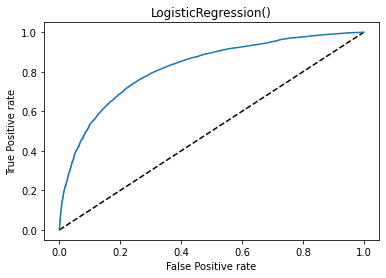




AUC Score of RandomForestClassifier()
0.6632321123595657




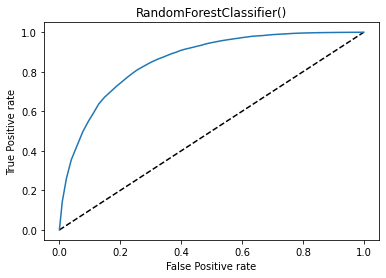




AUC Score of DecisionTreeClassifier()
0.6622977997061523




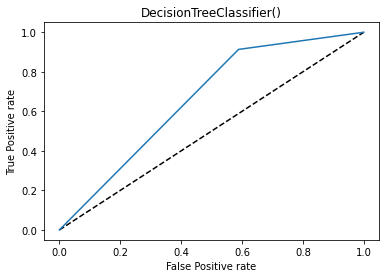




AUC Score of GaussianNB()
0.6589803612536406




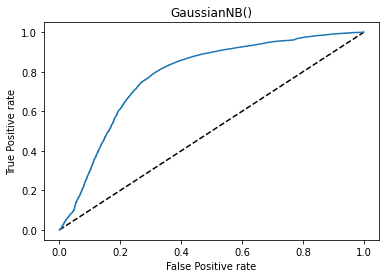

In [92]:
model=(lg,rfc,dt,gnb)
for m in model:
    y_pred_prob=m.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
    auc_score=roc_auc_score(y_test,m.predict(x_test))
    print('AUC Score of', m)
    print(auc_score)
    print('\n')
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=m)
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.title(m)
    plt.show()
    print('\n\n')

In [83]:
Study={'Model':['LogisticRegression','RandomForestClassifier','DecisionTreeClassifier','GaussianNB'],
      'Acc Score':[88,90,85,86],
      'Cross Val Score':[88,90,86,54],
      'ROC_AUC_curve':[55,66,66,65]}

In [84]:
Study=pd.DataFrame(Study)

In [85]:
Study

,Model,Acc Score,Cross Val Score,ROC_AUC_curve
0,LogisticRegression,88,88,55
1,RandomForestClassifier,90,90,66
2,DecisionTreeClassifier,85,86,66
3,GaussianNB,86,54,65


RandomForestClassiifer(RFC) has given us the best accuracy with the least difference from the cross validation and ROC_AUC.

We will select RFC and move forward for hypertuning the model

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters={'kernel':[100,250,500],'criterion':['gini','entropy'],'max_depth':np.arange(2,10)}

From sklearn we choose the parameters and see which parameters gives us the best result

In [86]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=3)

Fitting our best model for HyperTuning

In [84]:
GCV.fit(x_train,y_train)

In [85]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 9, 'n_estimators': 250}

In [82]:
Finalmod=RandomForestClassifier(criterion='gini', max_depth= 9, n_estimators= 250)
Finalmod.fit(x_train,y_train)
pred=Finalmod.predict(x_test)
acc=accuracy_score(y_test,pred)

print(acc*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

90.58028095050544
[[ 1620  5357]
 [  383 53576]]
              precision    recall  f1-score   support

           0       0.81      0.23      0.36      6977
           1       0.91      0.99      0.95     53959

    accuracy                           0.91     60936
   macro avg       0.86      0.61      0.65     60936
weighted avg       0.90      0.91      0.88     60936



In [77]:
y_pred_prob=Finalmod.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
auc_score=roc_auc_score(y_test,Finalmod.predict(x_test))
print('AUC Score of', Finalmod)
print(auc_score)

AUC Score of RandomForestClassifier(max_depth=9, n_estimators=250)
0.613023067963394


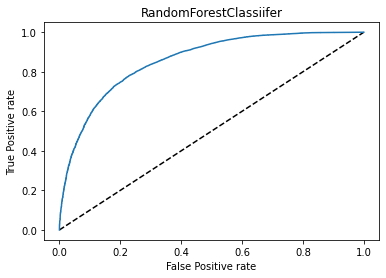

In [72]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=RandomForestClassifier)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('RandomForestClassiifer')
plt.show()

From all the model Random Forest has given us the best output of accuracy of 90.50% with ROC_AUC score of 61.30%.

Lets create the object file for our model

In [89]:
import joblib
joblib.dump(Finalmod,'micro_credit_defaulter.obj')

['micro_credit_defaulter.obj']